In [1]:
import os

import basd
import xarray as xr

In [2]:
data_path = '../../../OneDrive - PNNL/Documents/BASD/data'
#obs_hist_path = 'pr_day_CESM2-WACCM_historical_r2i1p1f1_gn_20100101-20150101.nc'
obs_hist_path = 'pr_ewembi_2011_2016.nc4'
sim_hist_path = 'pr_day_CESM2-WACCM_historical_r1i1p1f1_gn_20100101-20150101.nc'
sim_fut_path = 'pr_day_CESM2-WACCM_ssp370_r1i1p1f1_gn_20950101-21010101.nc'
pr_obs_hist = xr.open_dataset(os.path.join(data_path, obs_hist_path),
                              decode_coords = 'all')
pr_sim_hist = xr.open_dataset(os.path.join(data_path, sim_hist_path),
                              decode_coords = 'all')
pr_sim_fut = xr.open_dataset(os.path.join(data_path, sim_fut_path),
                             decode_coords = 'all')

C:\Users\prim232\virtualenvs\basd-dev\lib\site-packages\xarray\conventions.py:522: SerializationWarning: variable 'pr' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
C:\Users\prim232\AppData\Local\Temp\ipykernel_1272\1856048461.py:8: UserWarning: Variable(s) referenced in cell_measures not in variables: ['areacella']
  pr_sim_hist = xr.open_dataset(os.path.join(data_path, sim_hist_path),
C:\Users\prim232\AppData\Local\Temp\ipykernel_1272\1856048461.py:10: UserWarning: Variable(s) referenced in cell_measures not in variables: ['areacella']
  pr_sim_fut = xr.open_dataset(os.path.join(data_path, sim_fut_path),


In [7]:
# Making the data smaller for testing purposes
pr_sim_fut = pr_sim_fut[dict(lat=range(95, 105), lon=range(90, 100))]
pr_sim_hist = pr_sim_hist[dict(lat=range(95, 105), lon=range(90,100))]
pr_obs_hist = pr_obs_hist[dict(lat=range(95, 105), lon=range(90,100))]

In [3]:
params = basd.Parameters(lower_bound=0,
                         lower_threshold=0.0000011574,
                         trend_preservation='mixed',
                         distribution='gamma',
                         if_all_invalid_use=0)
ba = basd.Adjustment(pr_obs_hist,
                     pr_sim_hist,
                     pr_sim_fut,
                     'pr',
                     params,
                     remap_grid=True)

C:\Users\prim232\virtualenvs\basd-dev\lib\site-packages\xarray\coding\cftime_offsets.py:1130: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  return pd.date_range(
C:\Users\prim232\virtualenvs\basd-dev\lib\site-packages\xarray\coding\cftime_offsets.py:1130: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  return pd.date_range(


In [8]:
adj_result_loc = ba.adjust_bias_one_location(dict(lat=100, lon=100))

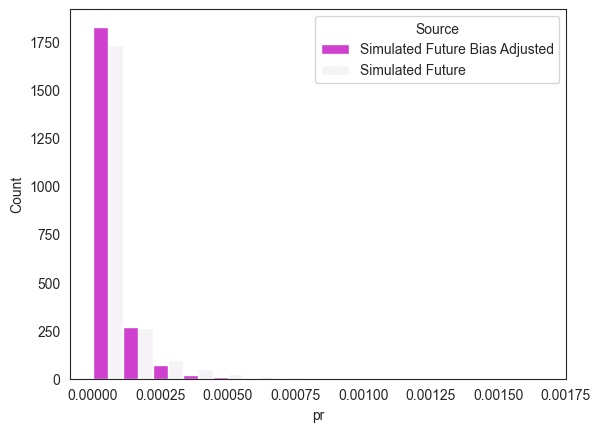

In [15]:
adj_result_loc.plot_hist()

In [14]:
adj_result_loc.plot_ecdf(log_x=True)

In [9]:
adj_result = ba.adjust_bias(n_jobs=-1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   14.9s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   18.8s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   19.7s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   26.8s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   31.1s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:   35.6s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   41.8s
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:   50.4s
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:   57.9s
[Parallel(n_jobs=-1)]: Done  96 out of 100 | elapsed:  1.1min remaining:    2.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.1min finished


In [6]:
pr_obs_hist

<xarray.Dataset>
Dimensions:  (lon: 720, lat: 360, time: 2192)
Coordinates:
  * lon      (lon) float32 -179.8 -179.2 -178.8 -178.2 ... 178.8 179.2 179.8
  * lat      (lat) float32 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75
  * time     (time) datetime64[ns] 2011-01-01 2011-01-02 ... 2016-12-31
Data variables:
    pr       (time, lat, lon) float32 ...
Attributes:
    source:          EartH2Observe data (E2OBS, Calton et al., 2016)\nWATCH F...
    institution:     Potsdam Institute for Climate Impact Research, Research ...
    Conventions:     CF-1.6
    title:           EartH2Observe, WFDEI and ERA-Interim data Merged and Bia...
    references:      Calton et al. (2016) Zenodo, doi:10.5281/zenodo.57760\nW...
    project:         Coordinated Research in Earth Systems and Climate: Exper...
    acknowledgment:  This project has received funding from the European Unio...
    license:         This dataset is freely available under the Creative Comm...
    cite_as:         Stefan Lange (2016) EartH2Observe, WFDEI and ERA-Interim...
    creator:         Stefan Lange (EWEMBI, slange@pik-potsdam.de)\nEmanuel Du...
    version:         1 (05 Nov 2018)

In [7]:
pr_sim_hist

<xarray.Dataset>
Dimensions:    (time: 1826, lat: 192, lon: 288, nbnd: 2)
Coordinates:
  * lat        (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lon        (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * time       (time) object 2010-01-01 00:00:00 ... 2015-01-01 00:00:00
    time_bnds  (time, nbnd) object ...
    lat_bnds   (lat, nbnd) float64 ...
    lon_bnds   (lon, nbnd) float64 ...
Dimensions without coordinates: nbnd
Data variables:
    pr         (time, lat, lon) float32 ...
Attributes: (12/45)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   674885.0
    branch_time_in_parent:  20075.0
    case_id:                4
    ...                     ...
    sub_experiment_id:      none
    table_id:               day
    tracking_id:            hdl:21.14100/dca2576b-c835-477e-83b2-2bb6cf3d0e2a
    variable_id:            pr
    variant_info:           CMIP6 CESM2 hindcast (1850-2014) with high-top at...
    variant_label:          r1i1p1f1

In [6]:
ba.obs_hist

<xarray.Dataset>
Dimensions:      (lon: 288, lat: 192, time: 2192)
Coordinates:
  * lon          (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * lat          (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * time         (time) datetime64[ns] 2011-01-01 2011-01-02 ... 2016-12-31
    spatial_ref  int32 0
Data variables:
    pr           (time, lat, lon) float32 nan nan nan ... 4.305e-07 4.296e-07
Attributes:
    source:          EartH2Observe data (E2OBS, Calton et al., 2016)\nWATCH F...
    institution:     Potsdam Institute for Climate Impact Research, Research ...
    Conventions:     CF-1.6
    title:           EartH2Observe, WFDEI and ERA-Interim data Merged and Bia...
    references:      Calton et al. (2016) Zenodo, doi:10.5281/zenodo.57760\nW...
    project:         Coordinated Research in Earth Systems and Climate: Exper...
    acknowledgment:  This project has received funding from the European Unio...
    license:         This dataset is freely available under the Creative Comm...
    cite_as:         Stefan Lange (2016) EartH2Observe, WFDEI and ERA-Interim...
    creator:         Stefan Lange (EWEMBI, slange@pik-potsdam.de)\nEmanuel Du...
    version:         1 (05 Nov 2018)

In [16]:
ba.obs_hist.to_netcdf(path=os.path.join(data_path, 're-mapped-pr_ewembi.nc'))